# Continuous ensemble training
Now that the data, the network frameworks and the training loops are set up, we can investigate fruther.

In [9]:
# Reload all modules in case of changes
importlib.reload(utils)

<module 'lib.utils' from '../lib/utils.py'>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

import sys; sys.path.insert(0, '..')
import importlib

from lib import data, networks, training, utils

## Load preprocessed dataset

In [3]:
# load 10 class data
train_ds_pre, train_ds_post, test_ds, generator = data.load_data()

## Have a look at the normal data

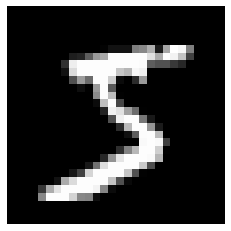

In [4]:
for x,y in train_ds_pre.take(1):
    utils.plot(x)

## Have a look at the generator data

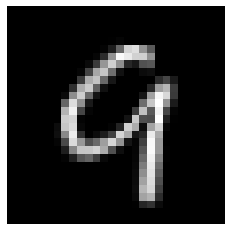

In [5]:
for x,y in generator:
    utils.plot(tf.convert_to_tensor(x))
    break

## Initialize the models

In [6]:
num_classes = 10
# Small model
model1 = networks.NN([128, 128], num_classes)
# Broad Model
model2 = networks.NN([512], num_classes)
# Mixed Model
model3 = networks.NN([256, 256], num_classes)
# cnn
model4 = networks.CNN([(32, 3), (64, 5), (128, 7)], num_classes)
# cnn small
model5 = networks.CNN([(32, 3), (64, 5)], num_classes)
# ensemble
ensemble = networks.Ensemble([model1, model2, model3, model4, model5])

## Load the weights from pre-training

In [7]:
model1.load_weights('../models/NN128128')
model2.load_weights('../models/NN512')
model3.load_weights('../models/NN256256')
model4.load_weights('../models/CNN3264128')
model5.load_weights('../models/CNN3264')

## Maybe pre-train more

In [ ]:
_,_,_ = training.pretraining(model1, train_ds_pre, test_ds, 10)

In [ ]:
_,_,_ = training.pretraining(model2, train_ds_pre, test_ds, 10)

In [ ]:
_,_,_ = training.pretraining(model3, train_ds_pre, test_ds, 10)

In [ ]:
_,_,_ = training.pretraining(model4, train_ds_pre, test_ds, 2)

In [ ]:
_,_,_ = training.pretraining(model5, train_ds_pre, test_ds, 4)

## Ensemble accuracy on normal test data after pre training

In [7]:
_, acc = training.test_ensemble(ensemble, test_ds, tf.keras.losses.CategoricalCrossentropy())

Testing models in ensemble
Model: __ 0
LOSS 0.3688032327196266 ::: ACC 0.9025909810126582
Model: __ 1
LOSS 0.30665578334769117 ::: ACC 0.9145569620253164
Model: __ 2
LOSS 0.30450713323264184 ::: ACC 0.9108979430379747
Model: __ 3
LOSS 0.10746759210147341 ::: ACC 0.9657832278481012
Model: __ 4
LOSS 0.589703015511549 ::: ACC 0.8227848101265823
Ensemble:
LOSS nan ::: ACC 0.8987341772151899


## Ensemble accuracy on generator after pre-training

In [10]:
_, acc = training.test_ensemble(ensemble, generator, tf.keras.losses.CategoricalCrossentropy())

Testing models in ensemble
Model: __ 0
LOSS 0.7467903999609686 ::: ACC 0.7693230676932307
Model: __ 1
LOSS 0.7463923781229352 ::: ACC 0.7795220477952205
Model: __ 2
LOSS 0.6734906677304753 ::: ACC 0.7893210678932107
Model: __ 3
LOSS 0.3754493957337404 ::: ACC 0.8874112588741125
Model: __ 4
LOSS 1.0818943728963006 ::: ACC 0.6717328267173283
Ensemble:
LOSS nan ::: ACC 0.7581241875812419


## Run Post-training dataset through ensemble

In [8]:
utils.run_data(ensemble, generator=generator)

In [ ]:
tf.data.experimental.save(ensemble.get_continuous_training_data(), '../datasets/ensemble_continuous_generator_ro30_seed_data_100322', compression='GZIP')
#ensemble.set_continuous_training_data(tf.data.experimental.load('../datasets/ensemble_continuous_generator_ro30_seed_data_090322', compression='GZIP'))

## Check how much data we gathered to train on

In [ ]:
utils.plot_collected_data(ensemble)

## Check how much data we could not predict

In [ ]:
len(ensemble.get_continuous_training_data())

## Training individual networks on the collected data

In [ ]:
_,_,_ = training.continuous_training(ensemble, generator, epochs=5)

## Test ensemble accuracy after continuous training

In [ ]:
_, acc = training.test(ensemble, generator, tf.keras.losses.CategoricalCrossentropy())
acc

## Get new data to train on

In [ ]:
utils.run_data(ensemble, generator=generator)

## Have a look at it

In [ ]:
utils.plot_collected_data(ensemble)

## Train some more

In [ ]:
_,_,_ = training.continuous_training(ensemble, generator, epochs=5)

## Test ensemble again

In [ ]:
_, acc = training.test(ensemble, generator, tf.keras.losses.CategoricalCrossentropy())
acc